In [1]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
dataset = pd.read_csv("dataset.csv")
dataset.describe()

#The dataset consists primarily 5 different types pollutants measured over the years in different states and cities of India.

#Where SO2 and NO2 are harmful gaseous emmissions; rspm, spm and pm2_5 come under susended air pollutants.

#The count clearly shows that there are variable number of Non-null entries for each of the pollutants.

#To understand the dataset further, we will have a look at all the different columns now and store them for future reference.

,so2,no2,rspm,spm,pm2_5
count,401096.000000,419509.000000,395520.000000,198355.000000,9314.000000
mean,10.829414,25.809623,108.832784,220.783480,40.791467
std,11.177187,18.503086,74.872430,151.395457,30.832525
min,0.000000,0.000000,0.000000,0.000000,3.000000
25%,5.000000,14.000000,56.000000,111.000000,24.000000
50%,8.000000,22.000000,90.000000,187.000000,32.000000
75%,13.700000,32.200000,142.000000,296.000000,46.000000
max,909.000000,876.000000,6307.033333,3380.000000,504.000000


In [3]:
dataset.columns
#Apart from the major pollutants, there are columns that refer to the respective states, agencies, sampling dates and the type.
#We will now have a look at what kind of data each of the columns consists of.

Index(['stn_code', 'sampling_date', 'state', 'location', 'agency', 'type',
       'so2', 'no2', 'rspm', 'spm', 'location_monitoring_station', 'pm2_5',
       'date'],
      dtype='object')

In [4]:
dataset.info()
#Understanding the pollutants briefly here.

#NO2: Nitrogen Dioxide and is emmitted mostly from combustion from power sources or transport.

#SO2: Sulphur Dioxide and is emmitted mostly from coal burning, oil burning, manufacturing of Sulphuric acid.

#spm: Suspended particulate matter and are known to be the deadliest form of air pollution. They are microscopic in nature and are found to be suspended in earth's atmosphere.

#rspm: Respirable suspended particulate matter. A sub form of spm and are respnsible for respiratory diseases.

#pm2_5: Suspended particulate matter with diameters less than 2.5 micrometres. They tend to remain suspended for longer durations and potentially very harmful.

#Let us get back to the data again and see how it is stored.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435742 entries, 0 to 435741
Data columns (total 13 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   stn_code                     291665 non-null  object 
 1   sampling_date                435739 non-null  object 
 2   state                        435742 non-null  object 
 3   location                     435739 non-null  object 
 4   agency                       286261 non-null  object 
 5   type                         430349 non-null  object 
 6   so2                          401096 non-null  float64
 7   no2                          419509 non-null  float64
 8   rspm                         395520 non-null  float64
 9   spm                          198355 non-null  float64
 10  location_monitoring_station  408251 non-null  object 
 11  pm2_5                        9314 non-null    float64
 12  date                         435735 non-null  object 
dtyp

In [5]:
replacements = {'state': {r'Uttaranchal': 'Uttarakhand', }}
dataset.replace(replacements, regex = True, inplace = True)

In [6]:
dataset.drop(['stn_code','agency','sampling_date','location_monitoring_station'],axis=1,inplace=True)
dataset.info()
dataset.head()

#Clearly there are lots of null values, noticeably in stn_code,agency, both of which should therefore be not ncluded further in the analysis.

#Intuitively, these two columns will hardly add much value to analysis.

#Now, focusing on the categorical variables, we are left with location_monitoring_station which consists of considerable nulls (approximately 27000).

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435742 entries, 0 to 435741
Data columns (total 9 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   state     435742 non-null  object 
 1   location  435739 non-null  object 
 2   type      430349 non-null  object 
 3   so2       401096 non-null  float64
 4   no2       419509 non-null  float64
 5   rspm      395520 non-null  float64
 6   spm       198355 non-null  float64
 7   pm2_5     9314 non-null    float64
 8   date      435735 non-null  object 
dtypes: float64(5), object(4)
memory usage: 29.9+ MB


,state,location,type,so2,no2,rspm,spm,pm2_5,date
0,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,2/1/1990
1,Andhra Pradesh,Hyderabad,Industrial Area,3.1,7.0,NaN,NaN,NaN,2/1/1990
2,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,2/1/1990
3,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN,3/1/1990
4,Andhra Pradesh,Hyderabad,Industrial Area,4.7,7.5,NaN,NaN,NaN,3/1/1990


In [7]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values = 'NaN', strategy = 'mean')
imputer = SimpleImputer().fit(dataset.iloc[:, 3:8].values)
dataset.iloc[:,3:8] = imputer.transform(dataset.iloc[:, 3:8].values)
dataset.info()
dataset.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435742 entries, 0 to 435741
Data columns (total 9 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   state     435742 non-null  object 
 1   location  435739 non-null  object 
 2   type      430349 non-null  object 
 3   so2       435742 non-null  float64
 4   no2       435742 non-null  float64
 5   rspm      435742 non-null  float64
 6   spm       435742 non-null  float64
 7   pm2_5     435742 non-null  float64
 8   date      435735 non-null  object 
dtypes: float64(5), object(4)
memory usage: 29.9+ MB


,state,location,type,so2,no2,rspm,spm,pm2_5,date
0,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",4.8,17.4,108.832784,220.78348,40.791467,2/1/1990
1,Andhra Pradesh,Hyderabad,Industrial Area,3.1,7.0,108.832784,220.78348,40.791467,2/1/1990
2,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.2,28.5,108.832784,220.78348,40.791467,2/1/1990
3,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.3,14.7,108.832784,220.78348,40.791467,3/1/1990
4,Andhra Pradesh,Hyderabad,Industrial Area,4.7,7.5,108.832784,220.78348,40.791467,3/1/1990


In [8]:
#Fixing the missing values in the column 'type'
dataset['type'].describe()
#With 10 Unique labels, we will fill the null values by the most common type, which is 'Residential, Rural and Other Areas'.
common_value='Residential,Rural and other Areas'
dataset['type']=dataset['type'].fillna(common_value)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435742 entries, 0 to 435741
Data columns (total 9 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   state     435742 non-null  object 
 1   location  435739 non-null  object 
 2   type      435742 non-null  object 
 3   so2       435742 non-null  float64
 4   no2       435742 non-null  float64
 5   rspm      435742 non-null  float64
 6   spm       435742 non-null  float64
 7   pm2_5     435742 non-null  float64
 8   date      435735 non-null  object 
dtypes: float64(5), object(4)
memory usage: 29.9+ MB


In [9]:

import matplotlib.pyplot as plt
import seaborn as sns

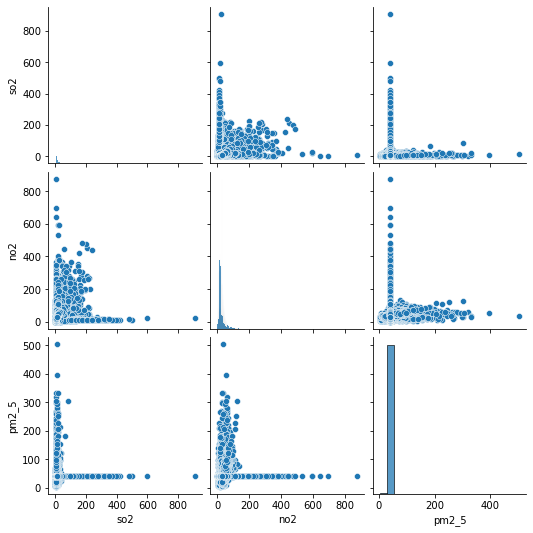

In [10]:
#We will start with pairplots to undestand the statistics and get a general idea about the interdependence of pollutants.
sns.pairplot(dataset[['so2','no2','pm2_5']])

#The idea is to understand through data, whether NO2 and SO2 have a role in particulate formation or not?

#Clearly there is some interdependence between SO2 and NO2, but no clear trend can be seen for pm2_5. Although, making fair asumptions would be premature as there were large number of missing values for pm2_5 as seen earlier.

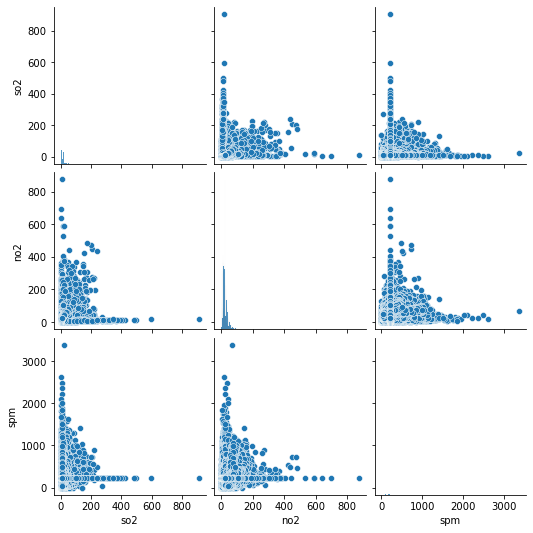

In [11]:
sns.pairplot(dataset[['so2','no2','spm']])

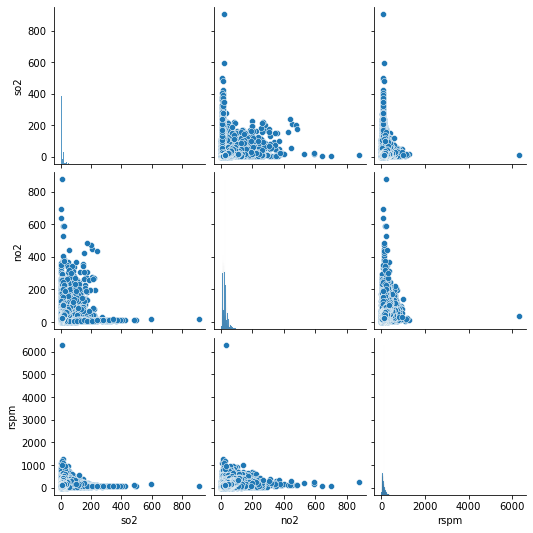

In [12]:
sns.pairplot(dataset[['so2','no2','rspm']])

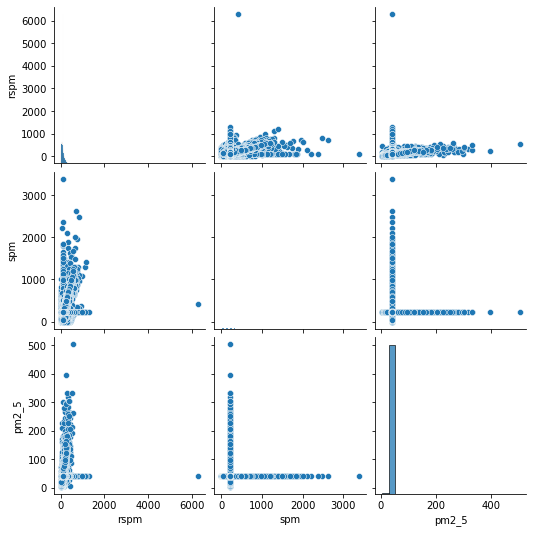

In [13]:
sns.pairplot(dataset[['rspm','spm','pm2_5']])

<AxesSubplot:xlabel='spm', ylabel='Density'>

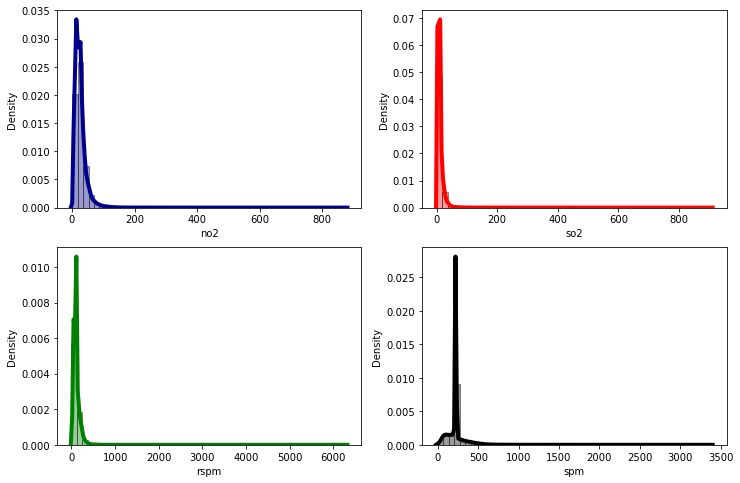

In [14]:
fig, axarr = plt.subplots(2, 2, figsize=(12, 8))
sns.distplot(dataset['no2'],hist=True,kde=True,
             color='darkblue',
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth':4},
             ax=axarr[0][0])

sns.distplot(dataset['so2'],hist=True,kde=True,
             color='red',
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth':4},
             ax=axarr[0][1])

sns.distplot(dataset['rspm'],hist=True,kde=True,
             color='green',
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth':4},
             ax=axarr[1][0])

sns.distplot(dataset['spm'],hist=True,kde=True,
             color='black',
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth':4},
             ax=axarr[1][1])


#So, now we see some trend. spm emmissions do demonstrate some relation with No2 and So2 emmissions.

#As the emmissions for NO2 increase, the spm emmissions demonstrate a slight increase.
#The right questions, here, therefore could be: Is there any percentage of No2 that gets converted to spm? It will be useful to get this answer as spm are known to have quite a harmful effect on human health.

<AxesSubplot:>

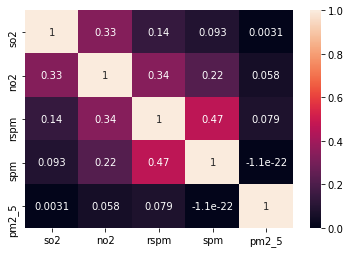

In [15]:
sns.heatmap(
    dataset.loc[:, ['state','so2', 'no2', 'rspm', 'spm', 'pm2_5']].corr(),
    annot=True
)

<AxesSubplot:xlabel='state'>

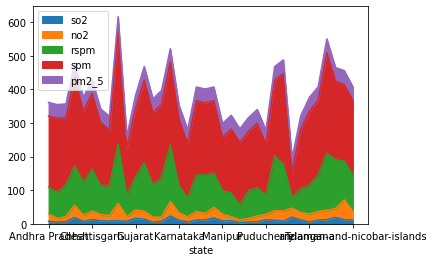

In [16]:
statewise_emmissions = dataset.groupby('state').mean()[['so2', 'no2', 'rspm', 'spm', 'pm2_5']]
statewise_emmissions.plot.area()

In [17]:
statewise_emmissions.describe()

,so2,no2,rspm,spm,pm2_5
count,36.000000,36.000000,36.000000,36.000000,36.000000
mean,10.494907,23.332822,100.963818,209.145700,40.703165
std,4.738625,10.882730,35.820355,45.433931,0.976729
min,3.695303,8.531134,32.000000,75.000000,35.878344
25%,7.117843,15.681748,78.877721,187.223257,40.791467
50%,9.730621,22.285826,96.082381,214.678224,40.791467
75%,12.450602,26.599025,117.313433,224.710106,40.791467
max,23.235550,58.852111,177.293687,334.814468,43.148310


In [18]:
Top5States_with_highest_No2=statewise_emmissions.sort_values(by='no2',ascending=False).head(10)
Top5States_with_highest_No2_sorted=Top5States_with_highest_No2.loc[:,['no2']]
Top5States_with_highest_No2_sorted.head()

,no2
state,
West Bengal,58.852111
Delhi,51.728223
Jharkhand,42.975080
Bihar,36.173283
Maharashtra,31.988282


In [19]:
Top5states_with_highest_So2=statewise_emmissions.sort_values(by='so2',ascending=False).head(10)
Top5states_with_highest_So2_sorted=Top5states_with_highest_So2.loc[:,['so2']]
Top5states_with_highest_So2_sorted.head()

,so2
state,
Jharkhand,23.235550
Sikkim,19.800000
Uttarakhand,19.225415
Bihar,18.825122
Maharashtra,17.143621


In [20]:
Top5states_with_highest_rspm=statewise_emmissions.sort_values(by='rspm',ascending=False).head()
Top5states_with_highest_rspm_sorted=Top5states_with_highest_rspm.loc[:,['rspm']]
Top5states_with_highest_rspm_sorted.head()

,rspm
state,
Delhi,177.293687
Uttar Pradesh,170.096762
Jharkhand,167.607687
Punjab,163.842751
Uttarakhand,144.615700


In [21]:
Top5states_with_highest_spm=statewise_emmissions.sort_values(by='spm',ascending=False).head(10)
Top5states_with_highest_spm_sorted=Top5states_with_highest_spm.loc[:,['spm']]
Top5states_with_highest_spm_sorted.head()

,spm
state,
Delhi,334.814468
Uttar Pradesh,298.972557
Rajasthan,270.046908
Bihar,264.703658
Jharkhand,246.335689


In [22]:
Top5states_with_highest_pm2_5=statewise_emmissions.sort_values(by='pm2_5',ascending=False).head(10)
Top5states_with_highest_pm2_5_sorted=Top5states_with_highest_pm2_5.loc[:,['pm2_5']]
Top5states_with_highest_pm2_5_sorted.head()

,pm2_5
state,
Delhi,43.148310
Madhya Pradesh,41.801628
West Bengal,41.478083
Telangana,41.074227
Odisha,40.995751


In [23]:
#Getting the statistics citywise for the pollutants
locationwise_emmissions=dataset.groupby('location').mean()[['so2','no2','rspm','spm','pm2_5']]

In [24]:
Top5Cities_with_highest_NO2=locationwise_emmissions.sort_values(by='no2',ascending=False).head()
Top5Cities_with_highest_NO2_sorted=Top5Cities_with_highest_NO2.loc[:,['no2']]
Top5Cities_with_highest_NO2_sorted.head()

,no2
location,
Howrah,77.225862
Badlapur,64.451282
Dombivli,60.483941
Kolkata,60.192063
Ulhasnagar,59.783158


In [25]:
Top5Cities_with_highest_So2=locationwise_emmissions.sort_values(by='so2',ascending=False).head(10)
Top5Cities_with_highest_So2_sorted=Top5Cities_with_highest_So2.loc[:,['so2']]
Top5Cities_with_highest_So2_sorted.head()


,so2
location,
Byrnihat,45.475065
Gajroula,38.471050
Jamshedpur,38.101352
Nanded,38.078791
Dharuhera,37.800000


In [26]:
Top5Cities_with_highest_rspm=locationwise_emmissions.sort_values(by='rspm',ascending=False).head(10)
Top5Cities_with_highest_rspm_sorted=Top5Cities_with_highest_rspm.loc[:,['rspm']]
Top5Cities_with_highest_rspm_sorted.head()

,rspm
location,
West Singhbhum,246.417219
Ghaziabad,241.417037
Allahabad,230.739709
Bareilly,229.932926
Ludhiana,211.272161


In [27]:
Top5Cities_with_highest_spm=locationwise_emmissions.sort_values(by='spm',ascending=False).head(10)
Top5Cities_with_highest_spm_sorted=Top5Cities_with_highest_spm.loc[:,['spm']]
Top5Cities_with_highest_spm_sorted.head()

,spm
location,
Meerut,445.722841
"Noida, Ghaziabad",439.581514
Dehradoon,384.270123
Noida,352.723920
Dharuhera,339.000000


In [28]:
Top5Cities_with_highest_pm2_5=locationwise_emmissions.sort_values(by='pm2_5',ascending=False).head(10)
Top5Cities_with_highest_pm2_5_sorted=Top5Cities_with_highest_pm2_5.loc[:,['pm2_5']]
Top5Cities_with_highest_pm2_5_sorted.head()

,pm2_5
location,
Bhopal,45.123252
Barrackpore,45.073784
Gwalior,45.032045
Keonjhar,44.565789
Durgapur,43.651873


In [29]:
#Visualising the emmissions according to the type and getting the relevant statistics
type_emmissions=dataset.groupby('type').mean()[['so2','no2','rspm','spm','pm2_5']]
type_emmissions.head()

,so2,no2,rspm,spm,pm2_5
type,,,,,
Industrial,23.632492,35.795214,108.832784,300.487057,40.791467
Industrial Area,13.121105,29.088317,119.966564,222.293673,40.881833
Industrial Areas,13.372831,29.737634,121.899020,246.368405,40.791467
RIRUO,10.912577,31.779908,103.617331,220.783480,39.474997
Residential,13.835891,21.331916,108.832784,272.668993,40.791467


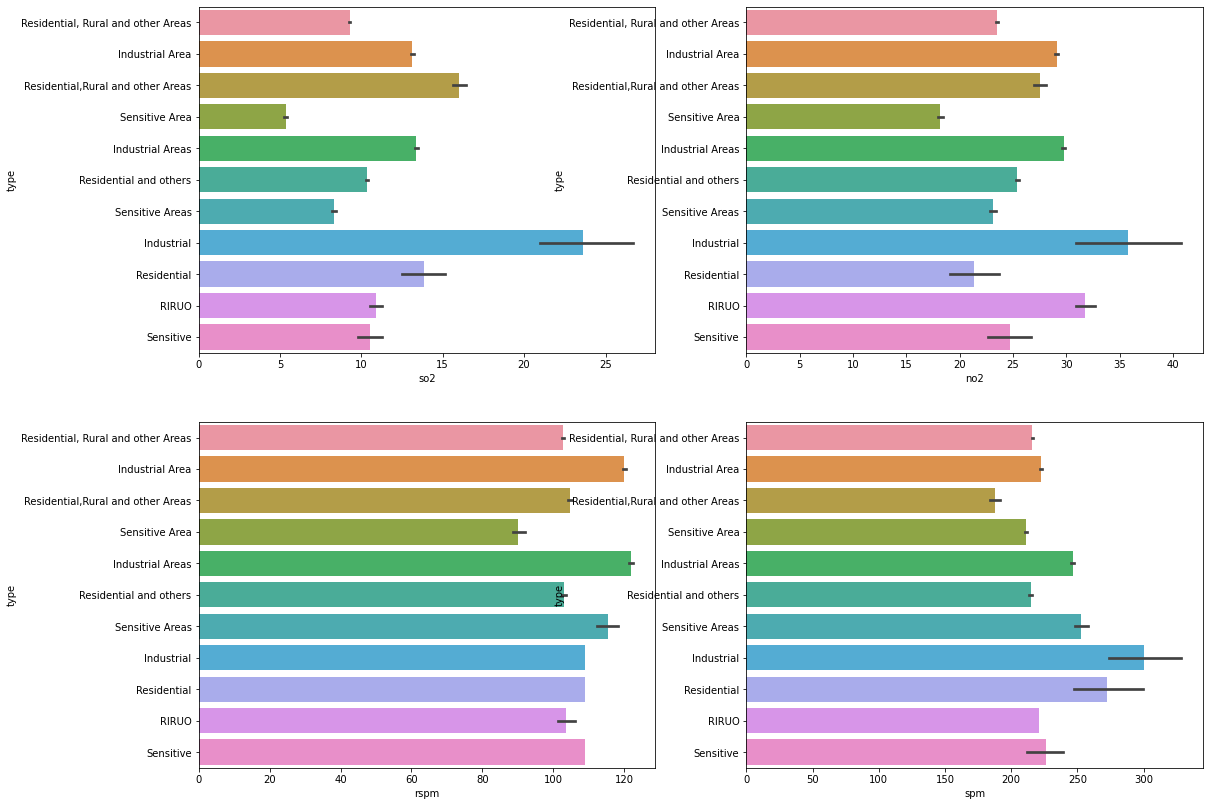

In [30]:
fig, axes = plt.subplots(nrows=2, ncols=2,figsize=(18,14))
ax = sns.barplot("so2", y="type",
                 data=dataset,
                 ax=axes[0,0]
                )
ax = sns.barplot("no2", y="type",
                 data=dataset,
                 ax=axes[0,1]
                )
ax = sns.barplot("rspm", y="type",
                 data=dataset,
                 ax=axes[1,0]
                )
ax = sns.barplot("spm", y="type",
                 data=dataset,
                 ax=axes[1,1]
                )

In [31]:
#Understanding the emmissions with time
dataset['date'].describe()

count        435735
unique         5067
top       3/19/2015
freq            253
Name: date, dtype: object

In [32]:
dataset.head()
common_value_date='03/19/2015'
dataset['date']=dataset['date'].fillna(common_value_date)
dataset.tail()

,state,location,type,so2,no2,rspm,spm,pm2_5,date
435737,West Bengal,ULUBERIA,RIRUO,22.000000,50.000000,143.000000,220.78348,40.791467,12/24/2015
435738,West Bengal,ULUBERIA,RIRUO,20.000000,46.000000,171.000000,220.78348,40.791467,12/29/2015
435739,andaman-and-nicobar-islands,NaN,"Residential,Rural and other Areas",10.829414,25.809623,108.832784,220.78348,40.791467,03/19/2015
435740,Lakshadweep,NaN,"Residential,Rural and other Areas",10.829414,25.809623,108.832784,220.78348,40.791467,03/19/2015
435741,Tripura,NaN,"Residential,Rural and other Areas",10.829414,25.809623,108.832784,220.78348,40.791467,03/19/2015


In [33]:
datewise_emmissions_SO2=dataset.groupby('date').mean()['so2']
datewise_emmissions_NO2=dataset.groupby('date').mean()['no2']
datewise_emmissions_rspm=dataset.groupby('date').mean()['rspm']
datewise_emmissions_spm=dataset.groupby('date').mean()['spm']

<AxesSubplot:xlabel='date'>

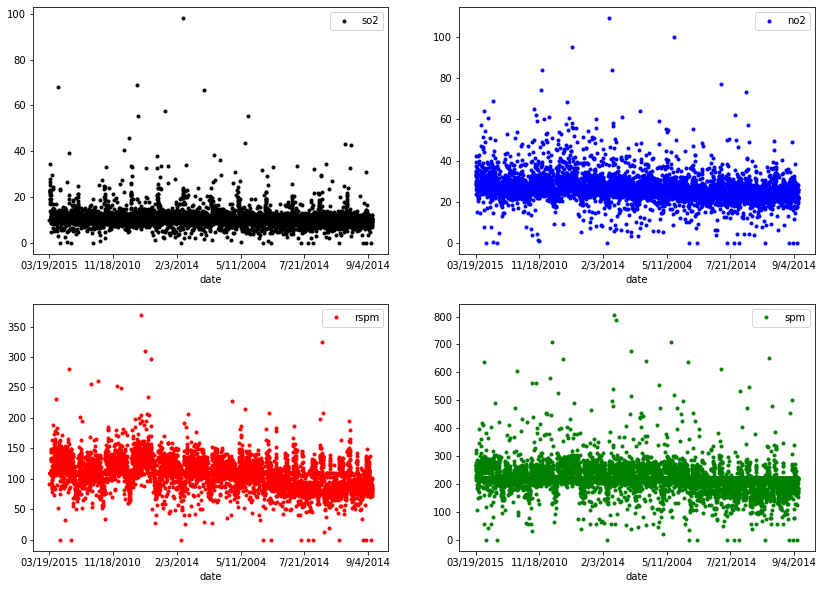

In [34]:
fig, axes = plt.subplots(nrows=2, ncols=2,figsize=(14,10))
datewise_emmissions_SO2.plot(style='k.',legend=True,ax=axes[0,0])
datewise_emmissions_NO2.plot(style='b.',legend=True,ax=axes[0,1])
datewise_emmissions_rspm.plot(style='r.',legend=True,ax=axes[1,0])
datewise_emmissions_spm.plot(style='g.', legend=True,ax=axes[1,1])


In [35]:
dataset.groupby(['so2'], sort=True)['state','date'].max().tail(10)

,state,date
so2,,
380.0,West Bengal,5/3/2011
393.0,West Bengal,5/11/2011
405.0,West Bengal,5/1/2011
407.0,West Bengal,1/29/2011
421.0,West Bengal,9/1/2011
482.0,West Bengal,12/27/2011
492.0,West Bengal,11/1/2011
498.0,West Bengal,4/2/2011
597.0,Maharashtra,6/25/2012


In [36]:
dataset.groupby(['no2'], sort=True)['state','date'].max().tail(10)

,state,date
no2,,
439.1,West Bengal,12/1/1994
444.0,West Bengal,11/20/2014
449.4,West Bengal,12/1/1994
475.0,West Bengal,1/1/1995
484.3,West Bengal,2/1/1995
530.0,Jharkhand,6/20/2011
592.0,West Bengal,11/4/2012
640.0,Maharashtra,1/13/2012
696.0,Himachal Pradesh,9/22/2014


In [37]:
dataset.groupby(['spm'], sort=True)['state','date'].max().tail(10)

,state,date
spm,,
1850.0,Rajasthan,5/6/2003
1885.0,Delhi,6/23/2004
1953.0,Rajasthan,5/27/2010
2015.0,Rajasthan,5/26/2010
2106.0,Rajasthan,5/13/2010
2213.0,Haryana,10/14/2005
2366.0,West Bengal,6/1/1996
2485.0,Rajasthan,5/27/2010
2610.0,Rajasthan,4/29/2004


In [38]:
dataset.groupby(['rspm'], sort=True)['state','date'].max().tail(10)

,state,date
rspm,,
966.000000,Uttarakhand,6/12/2013
975.000000,Rajasthan,7/26/2006
981.000000,West Bengal,1/17/2013
1082.000000,Haryana,2/6/2010
1100.000000,Rajasthan,5/24/2010
1111.000000,Uttar Pradesh,2/27/2012
1156.000000,Rajasthan,3/16/2011
1183.500000,Tamil Nadu,5/13/2010
1288.000000,Rajasthan,3/19/2011


In [39]:
dataset['date'] =  pd.to_datetime(dataset['date'],  format='%m/%d/%Y')
dataset.head()

#As it can be seen now, the date column is converted into datetime, instead of an object. This method is useful for 
#anlysing trends with time within the dataset.

,state,location,type,so2,no2,rspm,spm,pm2_5,date
0,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",4.8,17.4,108.832784,220.78348,40.791467,1990-02-01
1,Andhra Pradesh,Hyderabad,Industrial Area,3.1,7.0,108.832784,220.78348,40.791467,1990-02-01
2,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.2,28.5,108.832784,220.78348,40.791467,1990-02-01
3,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.3,14.7,108.832784,220.78348,40.791467,1990-03-01
4,Andhra Pradesh,Hyderabad,Industrial Area,4.7,7.5,108.832784,220.78348,40.791467,1990-03-01


In [40]:
#Making the date column as the index of the dataframe to make plotting and visulaisation easier.
dataset=dataset.set_index('date')
dataset.head()

,state,location,type,so2,no2,rspm,spm,pm2_5
date,,,,,,,,
1990-02-01,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",4.8,17.4,108.832784,220.78348,40.791467
1990-02-01,Andhra Pradesh,Hyderabad,Industrial Area,3.1,7.0,108.832784,220.78348,40.791467
1990-02-01,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.2,28.5,108.832784,220.78348,40.791467
1990-03-01,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.3,14.7,108.832784,220.78348,40.791467
1990-03-01,Andhra Pradesh,Hyderabad,Industrial Area,4.7,7.5,108.832784,220.78348,40.791467


In [41]:

yearly = dataset.resample('Y').mean()

monthly=dataset.resample('M').mean()

weekly=dataset.resample('W').mean()

daily=dataset.resample('D').mean()

<AxesSubplot:title={'center':'Daily Emmissions'}, xlabel='date'>

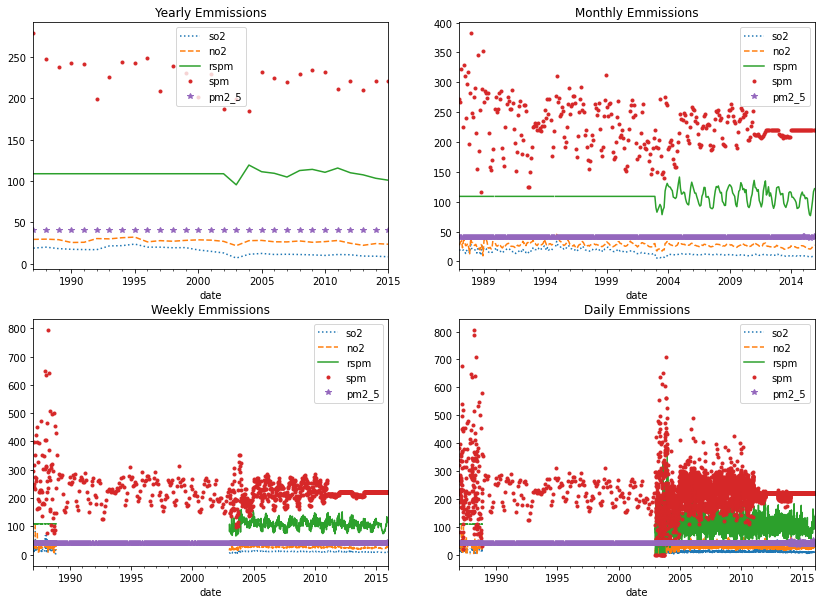

In [42]:


fig,axes=plt.subplots(nrows=2,ncols=2, figsize=(14,10))
yearly.plot(style=[':', '--', '-','.','*'],
            ax=axes[0,0],
            title='Yearly Emmissions')

monthly.plot(style=[':', '--', '-','.','*'],
             ax=axes[0,1],
             title='Monthly Emmissions')

weekly.plot(style=[':', '--', '-','.','*'],
            ax=axes[1,0],
            title='Weekly Emmissions')

daily.plot(style=[':', '--', '-','.','*'],
            ax=axes[1,1],
            title='Daily Emmissions')

<AxesSubplot:title={'center':'Daily Emmissions Distribution'}>

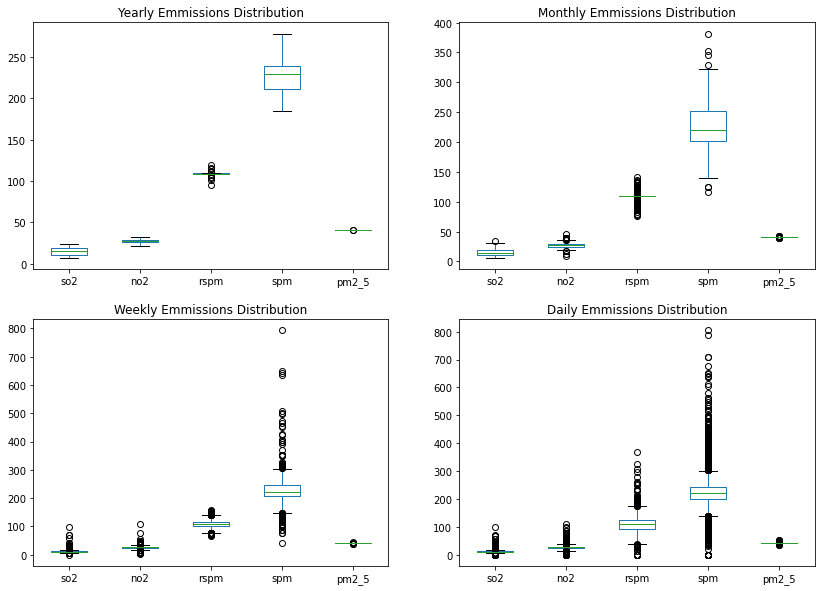

In [43]:

fig,axes2=plt.subplots(nrows=2,ncols=2, figsize=(14,10))
yearly.plot.box(
                ax=axes2[0,0],
                title='Yearly Emmissions Distribution')

monthly.plot.box(
                ax=axes2[0,1],
                title='Monthly Emmissions Distribution')

weekly.plot.box(
                ax=axes2[1,0],
                title='Weekly Emmissions Distribution')

daily.plot.box(
                ax=axes2[1,1],
                title='Daily Emmissions Distribution')

In [44]:
Top5Years_highest_SO2=yearly.sort_values(by='so2', ascending=False).head(5)
Top5Years_highest_SO2.loc[:,'so2']


date
1995-12-31    23.784821
1994-12-31    21.902739
1993-12-31    21.582684
1996-12-31    20.118915
1988-12-31    20.093999
Name: so2, dtype: float64

In [45]:
Top5Years_highest_NO2=yearly.sort_values(by='no2', ascending=False).head(5)
Top5Years_highest_NO2.loc[:,'no2']

date
1995-12-31    32.245832
1994-12-31    31.497093
1992-12-31    30.458832
1993-12-31    30.100067
1988-12-31    29.760823
Name: no2, dtype: float64

In [46]:
Top10Years_highest_spm=yearly.sort_values(by='spm', ascending=False).head(10)
Top10Years_highest_spm.loc[:,'spm']

date
1987-12-31    278.401290
1996-12-31    248.242864
1988-12-31    247.353570
1994-12-31    243.568709
1995-12-31    242.815737
1990-12-31    242.305362
1991-12-31    241.396689
1998-12-31    239.365472
1989-12-31    237.620273
2009-12-31    234.414305
Name: spm, dtype: float64

In [47]:
Top10Years_highest_rspm=yearly.sort_values(by='rspm', ascending=False).head(10)
Top10Years_highest_rspm.loc[:,'rspm']

date
2004-12-31    119.321672
2011-12-31    115.716189
2009-12-31    114.120319
2008-12-31    112.707609
2005-12-31    111.274511
2010-12-31    110.548384
2012-12-31    109.996489
2006-12-31    109.363718
2002-12-31    108.832784
2001-12-31    108.832784
Name: rspm, dtype: float64

In [48]:
#Getting the statistics out of each of the monthly merged datasets
Top10Months_highest_SO2=monthly.sort_values(by='so2', ascending=False).head(10)
Top10Months_highest_SO2.loc[:,'so2']


date
1994-12-31    33.452443
1987-12-31    30.257354
1988-11-30    28.119854
1995-01-31    27.776779
1995-12-31    26.117010
1993-12-31    25.821921
1995-02-28    25.791081
1997-01-31    25.463664
1994-11-30    24.990855
1995-10-31    24.687334
Name: so2, dtype: float64

In [49]:
Top20Months_highest_spm=monthly.sort_values(by='spm', ascending=False).head(20)
Top20Months_highest_spm.loc[:,'spm']

date
1987-12-31    381.750000
1988-12-31    352.000000
1988-07-31    345.916667
1987-05-31    328.300000
1987-03-31    322.826911
1987-09-30    316.695870
1998-12-31    312.006475
1987-06-30    310.969069
1994-12-31    309.889130
1987-08-31    297.166667
1996-12-31    291.279897
1988-04-30    291.015749
1995-12-31    290.966574
1988-11-30    288.375000
1991-04-30    287.555835
1990-06-30    285.439492
1989-02-28    285.191084
1987-11-30    282.545455
1990-04-30    281.889154
1989-03-31    281.212449
Name: spm, dtype: float64

In [50]:
Top20Months_highest_rspm=monthly.sort_values(by='rspm', ascending=False).head(20)
Top20Months_highest_rspm.loc[:,'rspm']

date
2004-12-31    141.228185
2011-01-31    135.623953
2011-12-31    134.740673
2005-12-31    132.623559
2009-12-31    131.742747
2004-11-30    131.169195
2003-12-31    130.620200
2009-01-31    128.448889
2010-01-31    128.064874
2011-11-30    127.348995
2010-12-31    126.815047
2009-02-28    126.736946
2004-01-31    126.656274
2006-01-31    126.335284
2008-02-29    126.327557
2003-11-30    125.432298
2008-12-31    125.418581
2007-12-31    125.342663
2012-03-31    124.929137
2013-01-31    124.917528
Name: rspm, dtype: float64